In [1]:
# -*- coding: utf-8 -*- #

# Write libraries here #########################################
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
# from astroquery.gama import GAMA
from jupyterthemes import jtplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, cluster, preprocessing, mixture
from time import time
from tqdm import tnrange, tqdm_notebook
%matplotlib inline

import seaborn as sns; sns.set(style="ticks", color_codes=True)
# %matplotlib notebook
################################################################

# Showing 500 columns and rows #################################
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
################################################################

# NOT CHANGE (The PATH for directory) ##########################
CURRENT_DIR_NAME = os.path.dirname(os.path.abspath(__name__))
PATH_DATA = os.path.join(CURRENT_DIR_NAME, '../data/')
PATH_HIST = os.path.join(CURRENT_DIR_NAME, '../histogram/')
PATH_PLOT = os.path.join(CURRENT_DIR_NAME, '../plots/')
PATH_IMG = os.path.join(CURRENT_DIR_NAME, '../images/')
PATH_HTML = os.path.join(CURRENT_DIR_NAME, '../html/')
PATH_TEX = os.path.join(CURRENT_DIR_NAME, '../for_tex/')
################################################################

#When you make plots, jtplot is better.
jtplot.style(theme='grade3', context='notebook', fscale=3, spines=True, gridlines='--', ticks=False, grid=False)

In [2]:
completed_data = pd.read_pickle(PATH_DATA + 'GAMADataForManifold.pickle')
completed_data = completed_data.sample(frac=1).reset_index(drop=True)

DATA_GAMA_FLUX = completed_data.copy()

N_COMP = 8

In [3]:
display(completed_data.describe())

RA           DEC      FUV_flux   FUV_fluxerr      NUV_flux  \
count  73768.000000  73768.000000  7.376800e+04  7.376800e+04  7.376800e+04   
mean     189.651980      0.375954  9.691125e-06  1.433836e-06  1.771798e-05   
std       33.758608      1.356445  7.012375e-05  1.041517e-05  1.183519e-04   
min      129.000109     -2.993768  3.332060e-10  5.765690e-09  9.628900e-10   
25%      175.047449     -0.746373  1.254405e-06  6.841088e-07  4.301507e-06   
50%      212.479781      0.323242  3.529270e-06  8.983840e-07  9.155720e-06   
75%      217.577880      1.461775  8.657525e-06  1.233078e-06  1.696793e-05   
max      223.499878      2.999971  1.114510e-02  1.909930e-03  2.128940e-02   

        NUV_fluxerr        u_flux     u_fluxerr        g_flux     g_fluxerr  \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean   6.959949e-06  3.941530e-05  5.811074e-06  1.233047e-04  6.644793e-06   
std    7.378952e-05  3.199671e-04  2.849965e-05  1.023210e-03  2.587866e-05   
min    3.340650e-08  1.335430e-08  2.499510e-07  4.235320e-08  1.292490e-07   
25%    9.051390e-07  9.912963e-06  1.989115e-06  3.048285e-05  9.470705e-07   
50%    1.337930e-06  1.797575e-05  2.772085e-06  5.210875e-05  1.543505e-06   
75%    2.466845e-06  3.337297e-05  4.167825e-06  9.683630e-05  3.796227e-06   
max    8.833300e-03  5.932940e-02  1.740130e-03  1.802290e-01  1.697120e-03   

             r_flux     r_fluxerr        i_flux     i_fluxerr        z_flux  \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean   2.410331e-04  9.234676e-06  3.432591e-04  1.262331e-05  4.200821e-04   
std    1.833359e-03  3.051119e-05  2.540001e-03  3.919699e-05  3.083389e-03   
min    1.538570e-08  1.932670e-07  3.210630e-08  2.658190e-07  4.034540e-08   
25%    6.772207e-05  1.510898e-06  9.731525e-05  2.303157e-06  1.206148e-04   
50%    1.118075e-04  2.541675e-06  1.616545e-04  3.871210e-06  1.992710e-04   
75%    1.949315e-04  5.820015e-06  2.830255e-04  8.681093e-06  3.484990e-04   
max    3.142220e-01  2.135520e-03  4.250200e-01  2.806200e-03  5.119440e-01   

          z_fluxerr        X_flux     X_fluxerr        Y_flux     Y_fluxerr  \
count  7.376800e+04  73768.000000  73768.000000  7.376800e+04  73768.000000   
mean   2.667000e-05     -4.725897     -4.726298  5.097796e-04      0.000035   
std    9.312436e-05     68.551593     68.551566  3.493307e-03      0.000169   
min    9.431560e-07   -999.000000   -999.000000  1.016350e-07      0.000001   
25%    7.361505e-06      0.000121      0.000003  1.429553e-04      0.000006   
50%    1.091005e-05      0.000201      0.000006  2.402225e-04      0.000010   
75%    1.832998e-05      0.000351      0.000013  4.254310e-04      0.000021   
max    4.074100e-03      0.418524      0.003546  5.234810e-01      0.010409   

             J_flux     J_fluxerr        H_flux     H_fluxerr        K_flux  \
count  7.376800e+04  73768.000000  7.376800e+04  73768.000000  7.376800e+04   
mean   6.000265e-04      0.000032  7.329608e-04      0.000037  7.477631e-04   
std    4.066153e-03      0.000131  4.841449e-03      0.000115  4.133784e-03   
min    9.308100e-07      0.000001  7.511100e-07      0.000002  5.765860e-07   
25%    1.667140e-04      0.000006  2.051290e-04      0.000011  2.323077e-04   
50%    2.856250e-04      0.000010  3.538470e-04      0.000016  4.020560e-04   
75%    5.096573e-04      0.000021  6.330400e-04      0.000029  7.051335e-04   
max    6.192200e-01      0.008726  7.565100e-01      0.006519  6.328390e-01   

          K_fluxerr       W1_flux    W1_fluxerr       W2_flux    W2_fluxerr  \
count  73768.000000  73768.000000  73768.000000  7.376800e+04  73768.000000   
mean       0.000038      0.000396      0.000068  2.707400e-04      0.000066   
std        0.000131      0.002416      0.000197  1.440871e-03      0.000228   
min        0.000003      0.000000      0.000005 -5.913180e-09      0.000004   
25%        0.000011      0.000130      0.000039  9.226087e-05 

In [4]:
# Select columns for classification and manifold learning
X = completed_data[['Z_TONRY', 'FUV_flux_kcorrected', 'NUV_flux_kcorrected',
                    'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
                    'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

# # Select columns for classification and manifold learning
# X = completed_data[['FUV_flux_kcorrected', 'NUV_flux_kcorrected',
#                     'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
#                     'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

X.describe()

Z_TONRY  FUV_flux_kcorrected  NUV_flux_kcorrected  \
count  73768.000000         73768.000000         73768.000000   
mean       0.200553           -17.261736           -18.144607   
std        0.102923             1.608674             1.438503   
min        0.004455           -23.496718           -23.426443   
25%        0.125719           -18.348351           -19.158826   
50%        0.183696           -17.439330           -18.284500   
75%        0.267543           -16.317363           -17.271464   
max        0.884314           -10.024130           -10.075412   

       U_flux_kcorrected  G_flux_kcorrected  R_flux_kcorrected  \
count       73768.000000       73768.000000       73768.000000   
mean          -19.327046         -20.628491         -21.216586   
std             1.195957           1.188454           1.252013   
min           -23.497447         -23.499008         -24.617519   
25%           -20.162511         -21.471235         -22.105362   
50%           -19.443777         -20.791009         -21.396347   
75%           -18.610227         -19.947353         -20.508551   
max           -15.000353         -15.068499         -15.474617   

       I_flux_kcorrected  Z_flux_kcorrected  Y_flux_kcorrected  \
count       73768.000000       73768.000000       73768.000000   
mean          -21.465056         -21.685446         -21.919099   
std             1.316428           1.354942           1.389135   
min           -25.222768         -25.714527         -25.765112   
25%           -22.406381         -22.652457         -22.915455   
50%           -21.659045         -21.899942         -22.148242   
75%           -20.707771         -20.923162         -21.139727   
max           -15.629315         -15.465886         -15.784269   

       J_flux_kcorrected  H_flux_kcorrected  K_flux_kcorrected  
count       73768.000000       73768.000000       73768.000000  
mean          -21.973418         -22.214019         -21.983333  
std             1.407693           1.445310           1.461947  
min           -25.681641         -25.903307         -25.765690  
25%           -22.985159         -23.254650         -23.038823  
50%           -22.212067         -22.471361         -22.246842  
75%           -21.183099         -21.413090         -21.169595  
max           -15.712080         -15.166688         -15.056899

In [5]:
# X['FUV_flux_kcorrected'] = 10**(-0.4*completed_data['FUV_flux_kcorrected']) 
# X['NUV_flux_kcorrected'] = 10**(-0.4*completed_data['NUV_flux_kcorrected'])
# X['U_flux_kcorrected'] = 10**(-0.4*completed_data['U_flux_kcorrected'])
# X['G_flux_kcorrected'] = 10**(-0.4*completed_data['G_flux_kcorrected'])
# X['R_flux_kcorrected'] = 10**(-0.4*completed_data['R_flux_kcorrected'])
# X['I_flux_kcorrected'] = 10**(-0.4*completed_data['I_flux_kcorrected'])
# X['Z_flux_kcorrected'] = 10**(-0.4*completed_data['Z_flux_kcorrected'])
# X['Y_flux_kcorrected'] = 10**(-0.4*completed_data['Y_flux_kcorrected'])
# X['J_flux_kcorrected'] = 10**(-0.4*completed_data['J_flux_kcorrected'])
# X['H_flux_kcorrected'] = 10**(-0.4*completed_data['H_flux_kcorrected'])
# X['K_flux_kcorrected'] = 10**(-0.4*completed_data['K_flux_kcorrected'])

# # X['FUV_flux_kcorrected'] = 10**(-0.4*completed_data['FUV_flux_kcorrected'] - 8) 
# # X['NUV_flux_kcorrected'] = 10**(-0.4*completed_data['NUV_flux_kcorrected'] - 8)
# # X['U_flux_kcorrected'] = 10**(-0.4*completed_data['U_flux_kcorrected'] - 8)
# # X['G_flux_kcorrected'] = 10**(-0.4*completed_data['G_flux_kcorrected'] - 8)
# # X['R_flux_kcorrected'] = 10**(-0.4*completed_data['R_flux_kcorrected'] - 8)
# # X['I_flux_kcorrected'] = 10**(-0.4*completed_data['I_flux_kcorrected'] - 8)
# # X['Z_flux_kcorrected'] = 10**(-0.4*completed_data['Z_flux_kcorrected'] - 8)
# # X['Y_flux_kcorrected'] = 10**(-0.4*completed_data['Y_flux_kcorrected'] - 8)
# # X['J_flux_kcorrected'] = 10**(-0.4*completed_data['J_flux_kcorrected'] - 8)
# # X['H_flux_kcorrected'] = 10**(-0.4*completed_data['H_flux_kcorrected'] - 8)
# # X['K_flux_kcorrected'] = 10**(-0.4*completed_data['K_flux_kcorrected'] - 8)

# X.describe()

# # X = X.sample(frac=0.).reset_index(drop=True)

In [6]:
# RobustScaler uses [0.25, 0.75] samples
# sc=preprocessing.RobustScaler(quantile_range=(25, 75))#StandardScaler()
sc=preprocessing.StandardScaler(with_mean=True, with_std=True)
# sc=preprocessing.MaxAbsScaler()
# sc=preprocessing.MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

# x=X[:,0]
# y=X[:,1]

# print(X_norm)

X = pd.DataFrame(X)
X.describe()

0             1             2             3             4   \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean   2.152148e-16  4.829443e-16  5.951037e-17  2.122497e-15  2.708201e-15   
std    1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00   
min   -1.905309e+00 -3.875879e+00 -3.671784e+00 -3.487107e+00 -2.415353e+00   
25%   -7.270935e-01 -6.754771e-01 -7.050561e-01 -6.985793e-01 -7.091144e-01   
50%   -1.637848e-01 -1.103982e-01 -9.724984e-02 -9.760513e-02 -1.367479e-01   
75%    6.508894e-01  5.870548e-01  6.069845e-01  5.993731e-01  5.731334e-01   
max    6.643504e+00  4.499145e+00  5.609477e+00  3.617792e+00  4.678372e+00   

                 5             6             7             8             9   \
count  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04  7.376800e+04   
mean   8.882868e-16  6.244463e-16 -2.895562e-15 -2.341411e-15  3.714539e-16   
std    1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00   
min   -2.716390e+00 -2.854496e+00 -2.973639e+00 -2.768658e+00 -2.634274e+00   
25%   -7.098823e-01 -7.150654e-01 -7.136966e-01 -7.172546e-01 -7.187276e-01   
50%   -1.435782e-01 -1.473617e-01 -1.583073e-01 -1.649553e-01 -1.695335e-01   
75%    5.655214e-01  5.752607e-01  5.625990e-01  5.610522e-01  5.614324e-01   
max    4.586221e+00  4.433042e+00  4.590309e+00  4.416326e+00  4.447973e+00   

                 10            11  
count  7.376800e+04  7.376800e+04  
mean  -7.909338e-16 -5.417770e-17  
std    1.000007e+00  1.000007e+00  
min   -2.552610e+00 -2.587223e+00  
25%   -7.200102e-01 -7.219801e-01  
50%   -1.780547e-01 -1.802463e-01  
75%    5.541606e-01  5.566164e-01  
max    4.876032e+00  4.737847e+00

In [7]:
%load_ext rpy2.ipython

In [8]:
%%R -i X -o out

# install.packages("FisherEM")
library(FisherEM)

# out = fem(X, K=9:13, model='all', nstart=30, disp=TRUE, mc.cores=(detectCores()-1))
out = fem(X, K=10:18, model='AkBk', nstart=10, disp=TRUE, mc.cores=(detectCores()-1))

R[write to console]: Loading required package: MASS

R[write to console]: Loading required package: parallel

R[write to console]: Loading required package: elasticnet

R[write to console]: Loading required package: lars

R[write to console]: Loaded lars 1.2




The selected model is AkBk with K = 17 ( icl = -426422.2 )


In [9]:
labels = np.array(out[2])

labels -= 1
N_COMP = int(out[1][0])
print(out)



* Model: The chosen model is AkBk with K = 17 (icl=-426422.2)
* Loading matrix (zero values are denoted by .):
        U1     U2     U3      U4     U5    U6     U7     U8     U9    U10
X0  0.0010 0.0010 0.0010 0.20539 0.0010 0.361 0.3059 0.0010 0.7492 0.0010
X1  0.1984 0.0010 0.0010 0.00100 0.0010 0.377 0.0703 0.0010 0.0010 0.0010
X2  0.1736 0.0010 0.0010 0.04251 0.0010 0.001 0.0010 0.0010 0.0282 0.1832
X3  0.1454 0.0204 0.0010 0.05055 0.5751 0.001 0.0010 0.0010 0.0514 0.0010
X4  0.2605 0.2801 0.0010 0.00100 0.0010 0.001 0.6415 0.0357 0.1749 0.1071
X5  0.0010 0.2465 0.0010 0.00100 0.0628 0.302 0.0010 0.0609 0.0484 0.0010
X6  0.5619 0.3501 0.3465 0.00587 0.1784 0.605 0.0010 0.0010 0.0651 0.0503
X7  0.0998 0.0336 0.0010 0.00172 0.4244 0.001 0.0010 0.0139 0.1818 0.5397
X8  0.0010 0.3148 0.0010 0.33847 0.1311 0.332 0.3130 0.2606 0.0010 0.3078
X9  0.2937 0.0192 0.0010 0.07154 0.0010 0.001 0.0010 0.8095 0.3107 0.0010
X10 0.0010 0.2981 0.0010 0.17404 0.0184 0.001 0.0010 0.0010 0.3039 0.1821
X

In [10]:
# X_prep = X_tsne

# # #Execute the K-means
# # km=cluster.KMeans(n_clusters=N_COMP)
# # z_km=km.fit(X_DIFF)

# # Execute the VBGMM
# vbgm = mixture.BayesianGaussianMixture(n_components=N_COMP, covariance_type='full', max_iter=1000, verbose=1)
# vbgm=vbgm.fit(X_prep)

# labels=vbgm.predict(X_prep)

(labels)

array([10, 11, 16, ...,  6, 13, 14], dtype=int32)

In [11]:
# Add the label from KMEANS to the original pd.DataFrame
# data_for_manifoldlearning_plus_label = X.join(pd.DataFrame(labels, index=X.index, columns=['label']))
DATA_GAMA_FLUX = completed_data.join(pd.DataFrame(labels, index=X.index, columns=['label']))

In [16]:
# Show the color-color plot with labels (each number on the plot shows the label number)

plt.figure(figsize=(20, 16))
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=(N_COMP-1))
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])

for i in tnrange(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'NUV-R'])
    print('label:%s, center_point=(%s, %s)'%(i, x_mean, y_mean))
    print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])))
    plt.text(x_mean, y_mean, '$%s$'%(i), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])/200, color=plt.cm.Spectral(i/(N_COMP-1)))
    

label:0, center_point=(0.8970653124936252, 2.929975583669139)
# of samples : 4671
label:1, center_point=(0.8236126500275486, 2.8306822730670085)
# of samples : 5756
label:2, center_point=(0.3196403439433847, 1.9222401549606785)
# of samples : 3848
label:3, center_point=(0.9913795936385055, 3.231209880614466)
# of samples : 4593
label:4, center_point=(0.9021648636471926, 3.7676761701049055)
# of samples : 3305
label:5, center_point=(0.8506967256543639, 2.59057402208836)
# of samples : 7269
label:6, center_point=(0.42837305994986136, 2.0596007486731134)
# of samples : 5193
label:7, center_point=(0.2768496944332704, 1.9520008595638225)
# of samples : 2587
label:8, center_point=(0.9383345834356979, 3.2167771384852095)
# of samples : 4882
label:9, center_point=(1.0134254683732662, 5.001933468233642)
# of samples : 3200
label:10, center_point=(1.039762974920347, 4.650666517231274)
# of samples : 5453
label:11, center_point=(0.5943112904193166, 2.002412352358477)
# of samples : 4600
label:12,

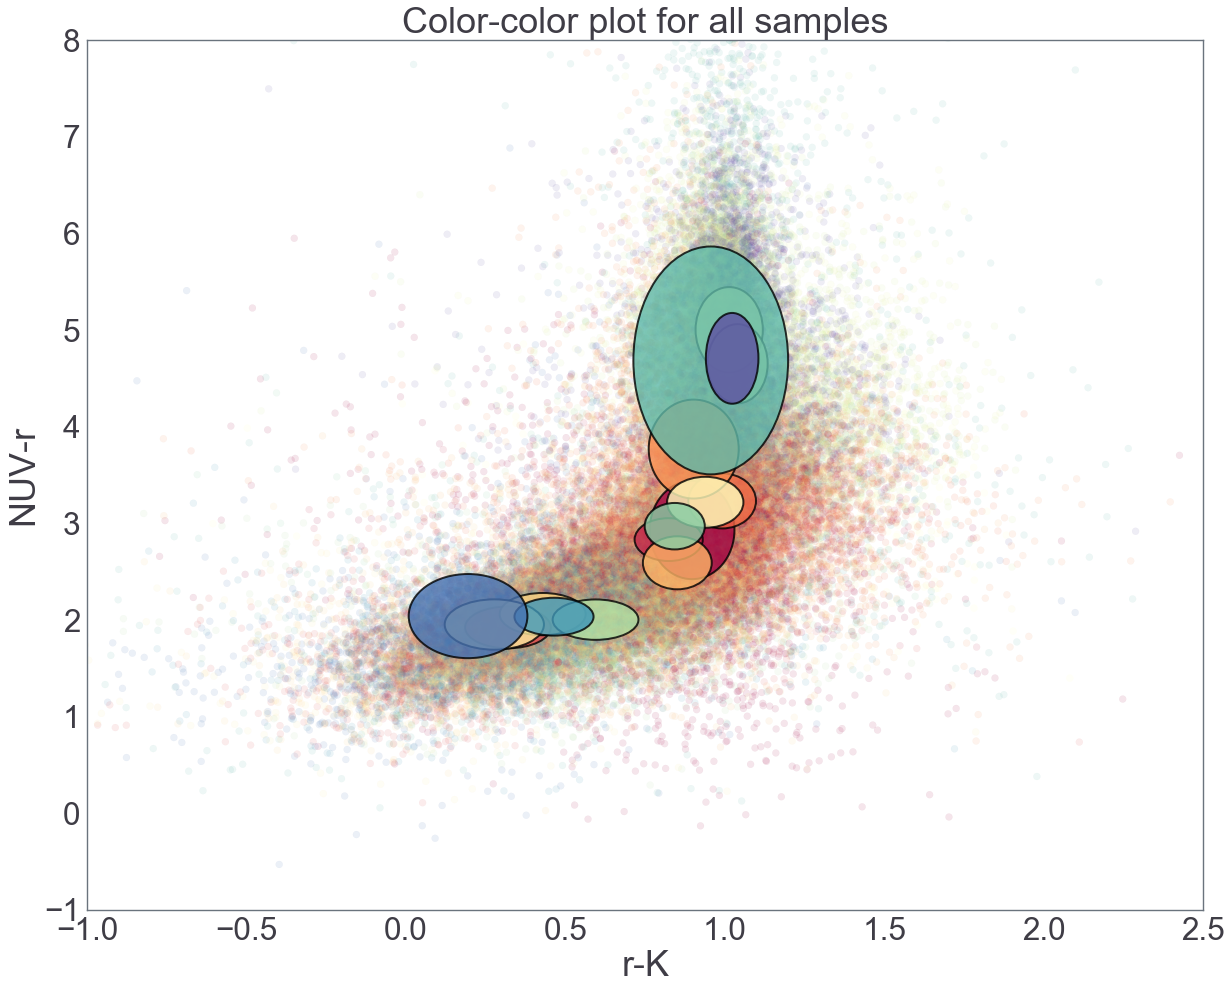

In [17]:
# Show the color-color plot with labels (each number on the plot shows the label number)

f = plt.figure(figsize=(20, 16))
ax = f.add_subplot(111)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.8, angle = 0, 
                        facecolor =plt.cm.Spectral(j/(N_COMP-1)), edgecolor='black', lw = 2)
        ax.add_patch(e1)


label:0, center_point=(0.8970653124936252, 2.929975583669139)
# of samples : 616
label:1, center_point=(0.8236126500275486, 2.8306822730670085)
# of samples : 0
label:2, center_point=(0.3196403439433847, 1.9222401549606785)
# of samples : 0
label:3, center_point=(0.9913795936385055, 3.231209880614466)
# of samples : 0
label:4, center_point=(0.9021648636471926, 3.7676761701049055)
# of samples : 0
label:5, center_point=(0.8506967256543639, 2.59057402208836)
# of samples : 0
label:6, center_point=(0.42837305994986136, 2.0596007486731134)
# of samples : 0
label:7, center_point=(0.2768496944332704, 1.9520008595638225)
# of samples : 0
label:8, center_point=(0.9383345834356979, 3.2167771384852095)
# of samples : 0
label:9, center_point=(1.0134254683732662, 5.001933468233642)
# of samples : 0
label:10, center_point=(1.039762974920347, 4.650666517231274)
# of samples : 0
label:11, center_point=(0.5943112904193166, 2.002412352358477)
# of samples : 0
label:12, center_point=(0.8426369899903953

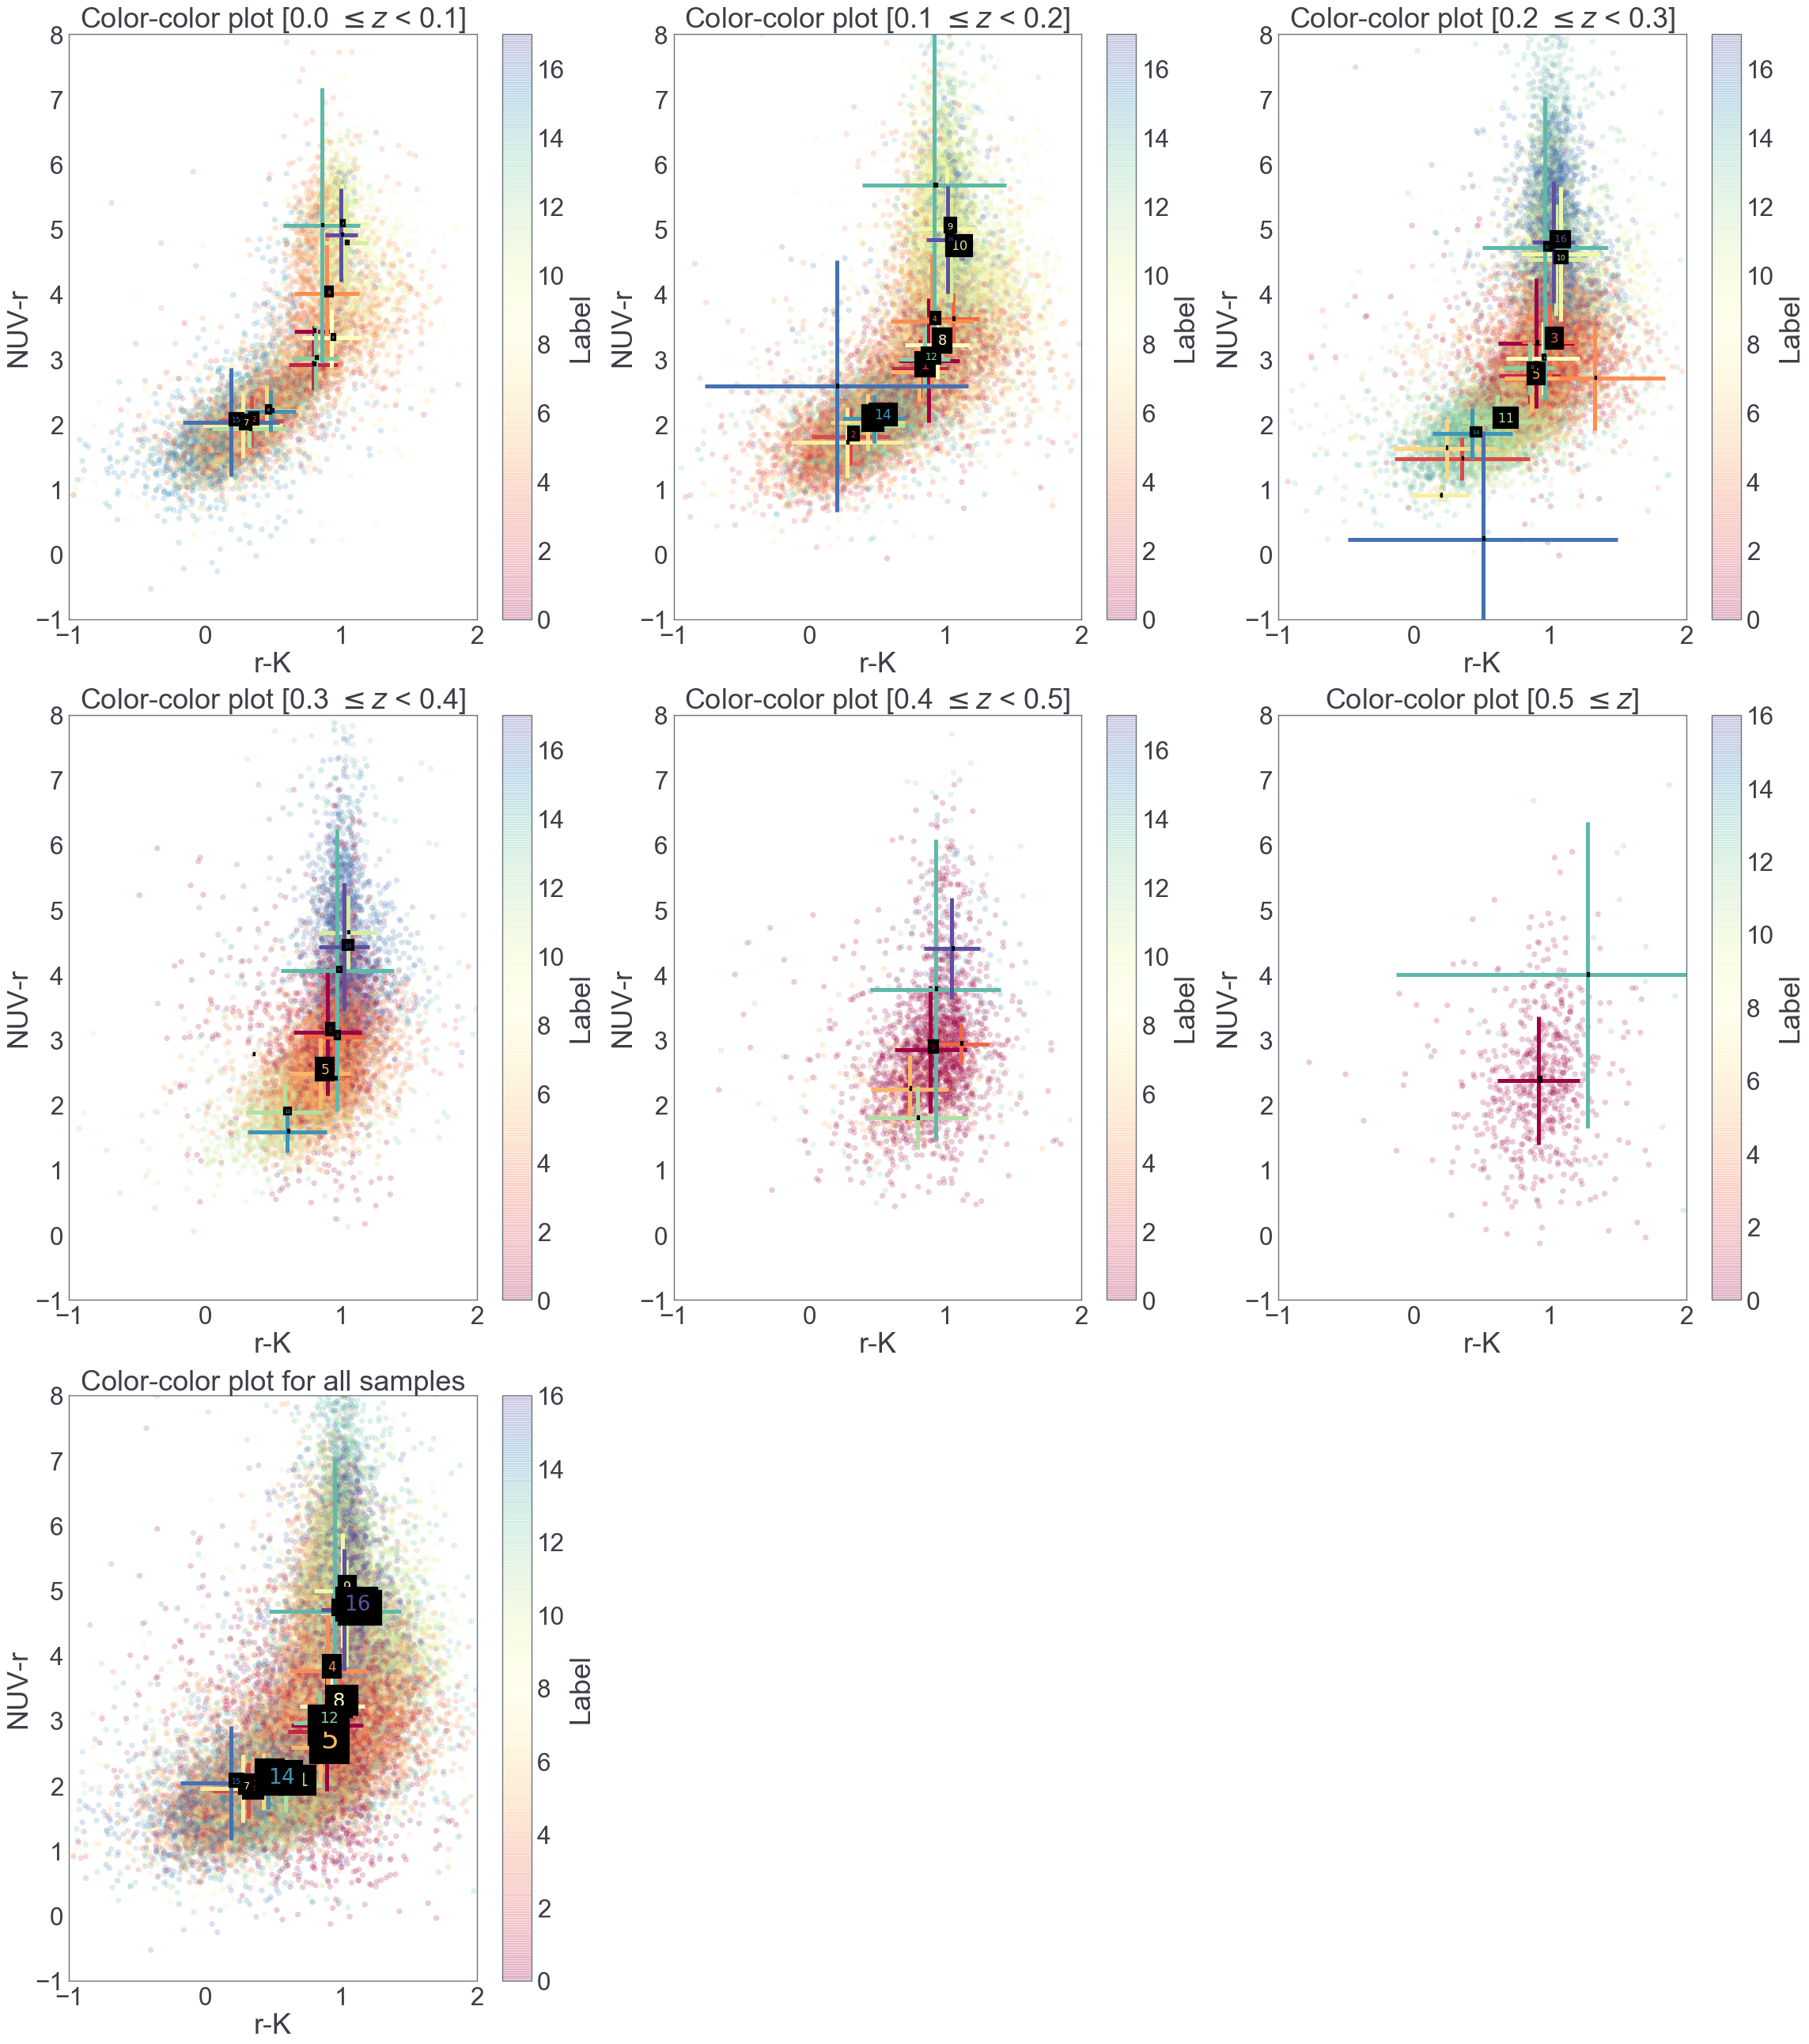

In [23]:
#  Color-color plot with colorbars based on redshift
plt.figure(figsize=(32, 36))
for i in tnrange(6):
    if i <= 4:
        plt.subplot(331 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=N_COMP)
        plt.xlabel('r-K')
        plt.xlim([-1, 2])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(N_COMP):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
    else:
        plt.subplot(331 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=(N_COMP-1))
        plt.xlabel('r-K')
        plt.xlim([-1, 2])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(N_COMP):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
plt.subplot(337)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax= (N_COMP-1))
plt.xlabel('r-K')
plt.xlim([-1, 2])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
plt.tight_layout()

In [19]:
#  Color-color plot with colorbars based on redshift
fig = plt.figure(figsize=(32, 48))
for i in tnrange(6):
    if i <= 4:
        ax = fig.add_subplot(421+i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        ax.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        ax.set_xlabel('r-K')
        ax.set_xlim([-1, 2.5])
        ax.set_ylabel('NUV-r')
        ax.set_ylim([-1, 8])
        ax.set_title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.6, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
                ax.add_patch(e1)
    else:
        ax = fig.add_subplot(421+i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        ax.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        ax.set_xlabel('r-K')
        ax.set_xlim([-1, 2.5])
        ax.set_ylabel('NUV-r')
        ax.set_ylim([-1, 8])
        ax.set_title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.6, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
                ax.add_patch(e1)

ax = fig.add_subplot(427)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.9, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
        ax.add_patch(e1)
        
plt.subplot(428)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=N_COMP-1)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(15):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5)
plt.tight_layout()